In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# Explore and prep the dataset.
# I want to use this toy example to see if any dietary components correlate with covid deaths.
# There's a lot left out here, like recovery and many other factors 
# This is just to play with some ensemble methods. (Not dietary advice!)

covid_df = pd.read_csv("kcalData.csv")
unnecessary_fields = ['Country','Confirmed','Active','Unit (all except Population)', 'Recovered']
covid_df=covid_df.drop(unnecessary_fields, axis=1)
covid_df = covid_df.dropna()
covid_df['Deaths'] = covid_df['Deaths']*covid_df['Population']
covid_df=covid_df.drop(['Population'], axis=1)
print('Deaths range between', covid_df['Deaths'].min(),' and ', covid_df['Deaths'].max())
y = covid_df['Deaths']
del covid_df['Deaths']
# We need to do some feature engineering here because these values are strings.
covid_df['Undernourished'] = [2.5 if x=='<2.5' else float(x) for x in covid_df['Undernourished']]
covid_df['Undernourished'] = covid_df['Undernourished'].astype('float64')
print(covid_df.describe())

Deaths range between 0.0  and  19950900.0
       Alcoholic Beverages  Animal Products  Animal fats  \
count           153.000000       153.000000   153.000000   
mean              1.333344         9.109501     1.286703   
std               1.075572         4.794205     1.335806   
min               0.000000         1.623700     0.040800   
25%               0.395600         4.866900     0.336000   
50%               1.217800         8.813800     0.782500   
75%               2.038100        12.868100     1.902700   
max               5.157400        22.291100     7.800700   

       Aquatic Products, Other  Cereals - Excluding Beer        Eggs  \
count               153.000000                153.000000  153.000000   
mean                  0.002876                 20.645743    0.431048   
std                   0.032452                  6.478269    0.311034   
min                   0.000000                  8.956500    0.018800   
25%                   0.000000                 15.333700 

Text(0.5, 1.0, 'feature correlations')

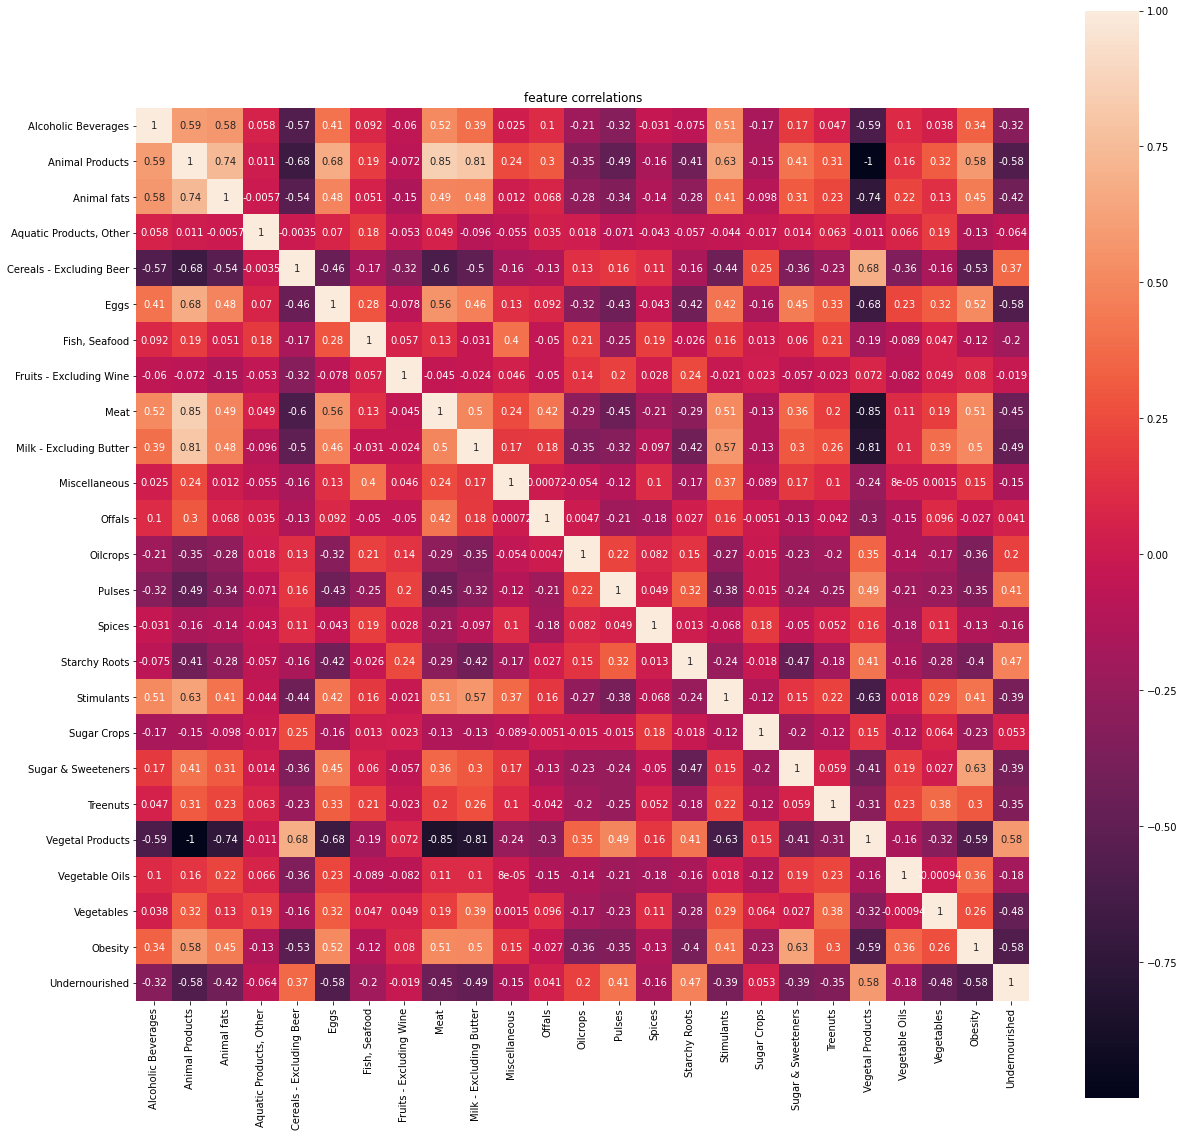

In [86]:
corr = covid_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, annot=True, square=True)
plt.title('feature correlations')

In [82]:
X_norm = preprocessing.normalize(covid_df.to_numpy())
X_stand = preprocessing.scale(X_norm)
X_train, X_test, y_train, y_test = train_test_split(covid_df, y, 
                                                    train_size=0.7, 
                                                    random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
                                                    train_size=0.5, 
                                                    random_state=42)